In [55]:
#import pandas library under the alias pd
#import visualization libraries matplotlib and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 
from functools import reduce

In [3]:
name_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\name_basics.csv")
title_akas = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_akas.csv")
title_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_basics.csv")
title_ratings = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_ratings.csv")
title_crew = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_crew.csv")

In [4]:
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [7]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [9]:
name_basics.rename(columns = {'nconst' : 'tconst'}, inplace = True)

In [10]:
#title_crew.set_index('tconst', inplace=True)
#title_ratings.set_index('tconst', inplace=True)
name_basics.set_index('tconst', inplace=True)

In [11]:
name

NameError: name 'name' is not defined

In [12]:
# create a list of data sets
IMDb_directors = [title_crew, title_ratings]

IMDb_directors_data = reduce(lambda  left,right: pd.merge(left,right,on=['tconst'],
                                            how='outer'), IMDb_directors).fillna('null')

In [13]:
IMDb_directors_data

,tconst,directors,writers,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,3.9,219
1,tt0438973,null,"nm0175726,nm1802864",null,null
2,tt0462036,nm1940585,nm1940585,5.5,18
3,tt0835418,nm0151540,"nm0310087,nm0841532",5,8147
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,5.8,875
...,...,...,...,...,...
146139,tt8999974,nm10122357,nm10122357,null,null
146140,tt9001390,nm6711477,nm6711477,null,null
146141,tt9001494,"nm10123242,nm10123248",null,null,null
146142,tt9004986,nm4993825,nm4993825,8.4,7


In [14]:
IMDb_directors_data.dtypes

tconst           object
directors        object
writers          object
averagerating    object
numvotes         object
dtype: object

Need to convert object to float to do math

In [15]:
IMDb_directors_data["average_rating"] = pd.to_numeric(IMDb_directors_data.averagerating, errors='coerce')

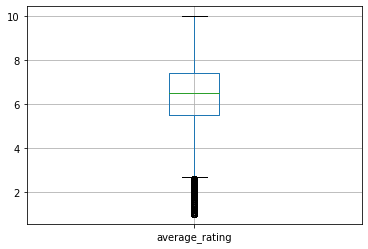

In [16]:
IMDb_directors_data.boxplot(column = ['average_rating'])

C:\Users\rafav\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rafav\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


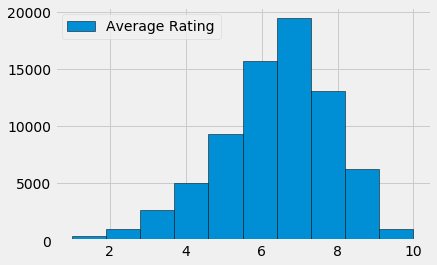

In [17]:
plt.style.use('fivethirtyeight')
plt.hist(IMDb_directors_data['average_rating'], edgecolor = 'black', label = 'Average Rating')
plt.legend()

In [18]:
top_movies = IMDb_directors_data.sort_values(['average_rating'], ascending=[0])
top_movies.head(25)

,tconst,directors,writers,averagerating,numvotes,average_rating
3288,tt5344358,nm6925060,null,10,6,10.0
95575,tt4944240,nm6893562,null,10,5,10.0
43344,tt5390098,"nm4637768,nm5472684",null,10,5,10.0
142521,tt5089804,nm7633303,nm7633303,10,7,10.0
25403,tt4960818,nm7223265,"nm6680574,nm7223265",10,8,10.0
36501,tt10176328,nm10616933,"nm10616933,nm10617142",10,5,10.0
5507,tt6295832,nm3704168,null,10,5,10.0
116243,tt9715646,nm3388005,null,10,20,10.0
11217,tt1770682,nm4166962,nm4166961,10,5,10.0
2016,tt10378660,null,null,10,5,10.0


In [19]:
directors_names = IMDb_directors_data.join(name_basics, how='outer')
directors_names.sort_values(['average_rating'], ascending=[0])

,tconst,directors,writers,averagerating,numvotes,average_rating,primary_name,birth_year,death_year,primary_profession,known_for_titles
3288,tt5344358,nm6925060,null,10,6,10.0,NaN,NaN,NaN,NaN,NaN
95575,tt4944240,nm6893562,null,10,5,10.0,NaN,NaN,NaN,NaN,NaN
43344,tt5390098,"nm4637768,nm5472684",null,10,5,10.0,NaN,NaN,NaN,NaN,NaN
142521,tt5089804,nm7633303,nm7633303,10,7,10.0,NaN,NaN,NaN,NaN,NaN
25403,tt4960818,nm7223265,"nm6680574,nm7223265",10,8,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
nm9993494,NaN,NaN,NaN,NaN,NaN,NaN,Amjad Ali,NaN,NaN,writer,tt7722258
nm9993573,NaN,NaN,NaN,NaN,NaN,NaN,Lakisha Louissaint,NaN,NaN,"director,writer,producer",tt10299418
nm9993616,NaN,NaN,NaN,NaN,NaN,NaN,Ryan Mac Lennan,NaN,NaN,actor,tt4844148
nm9993650,NaN,NaN,NaN,NaN,NaN,NaN,Marcin Balcerak,NaN,NaN,actor,tt8739208


In [20]:
title_basics['genres'].value_counts()

Documentary                  32185
Drama                        21486
Comedy                        9177
Horror                        4372
Comedy,Drama                  3519
                             ...  
History,Mystery                  1
Adventure,News                   1
Crime,Sport,Thriller             1
History,Reality-TV,War           1
Adventure,History,Western        1
Name: genres, Length: 1085, dtype: int64

In [21]:
title_basics.drop(columns=['original_title'], inplace=True)

In [23]:
title_basics.isna().sum()

tconst                 0
primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [27]:
ratings_and_genres = pd.merge(title_basics, title_ratings, on='tconst', how='inner')

In [28]:
ratings_and_genres.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [30]:
ratings_and_genres.dtypes

tconst              object
primary_title       object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

We need to change genres into a string so we can parse the string 

In [36]:
ratings_and_genres['genres'] = ratings_and_genres['genres'].astype(str)

In [37]:
ratings_and_genres.dtypes

tconst              object
primary_title       object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [38]:
ratings_and_genres.genres = ratings_and_genres.genres.astype(str)

In [39]:
ratings_and_genres.dtypes

tconst              object
primary_title       object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

sanity check that converting to a string is working. 

In [40]:
ratings_and_genres.astype(str)['genres'].map(lambda x:  type(x))

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
73851    <class 'str'>
73852    <class 'str'>
73853    <class 'str'>
73854    <class 'str'>
73855    <class 'str'>
Name: genres, Length: 73856, dtype: object

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ratings_and_genres['genres'] = ratings_and_genres['genres'].str.split(',')


ax = ratings_and_genres.plot.barh('genres',width=0.9)

ax

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000020F2A7C8708> (for post_execute):


KeyboardInterrupt: 

In [45]:
genre_count_series

i     40466
n     42647
D     48541
y     53310
,     55438
e     66291
o     73527
m     82188
a    101531
r    108411
dtype: int64

In [50]:
genre_count_series.head(20)

G        2
V       17
N      579
w      581
W     1133
-     2225
S     3388
g     3809
B     3809
v     3817
p     4988
M     5728
R     6606
F     7744
T     8234
H    10499
s    11538
h    12029
A    12551
l    20587
dtype: int64

In [51]:
ratings_and_genres.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.002934,0.041294,-0.028481
runtime_minutes,0.002934,1.000000,-0.006963,0.012472
averagerating,0.041294,-0.006963,1.000000,0.044478
numvotes,-0.028481,0.012472,0.044478,1.000000


In [52]:
ratings_and_genres.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


C:\Users\rafav\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rafav\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


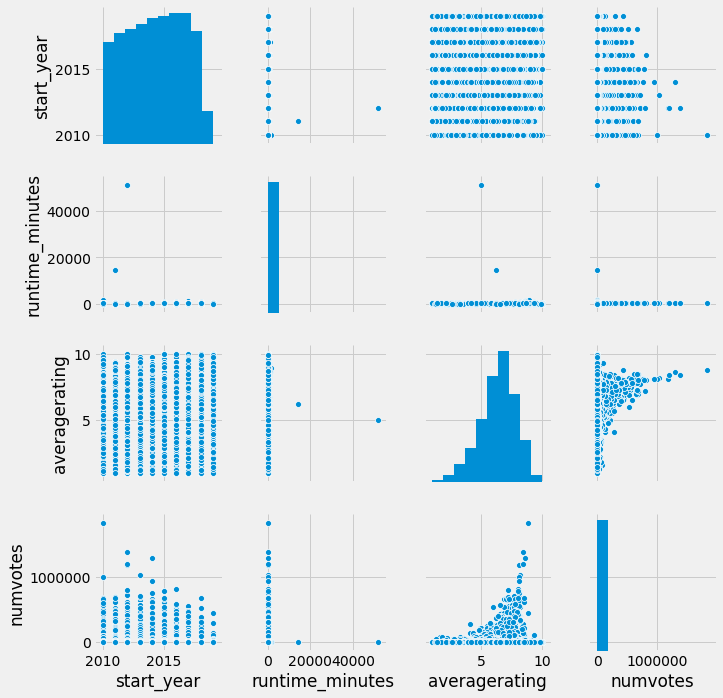

In [54]:
sns.pairplot(ratings_and_genres)

In [ ]:
ratings_and_genres[[‘content_rating’,’title’]].groupby(‘content_rating’).count().plot(kind=’bar’, title=’Content Rating Visualization’)
plt.xlabel(‘Content Rating’)
plt.ylabel(‘Title Count’